In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [2]:
# Load the daaset
penguin_dataset = pd.read_csv('penguins.csv')
penguins = pd.DataFrame(penguin_dataset)

# Printing information about the data frame
penguins.info()

print()

# Printing statistics of the dataframe
penguins.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB



,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


## Data Preprocessing

In [3]:
# Check for duplicates
penguins.duplicated().sum()

0

In [4]:
# Convert the 'species', 'island', and 'sex' columns to categorical
penguins['species'] = penguins['species'].astype('category')
penguins['island'] = penguins['island'].astype('category')
penguins['sex'] = penguins['sex'].astype('category')

In [5]:
# Drop year column as it not useful
penguins.drop(['year'], axis=1, inplace=True)
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


In [6]:
# Impute missing data values in column having string datatype
def fill_missing_data(df, field):
    df.loc[:, field] = pd.to_numeric(df.loc[:, field], errors='coerce')
    df.loc[:, field] = df.loc[:, field].fillna(df.loc[:, field].mean())

fill_missing_data(penguins, 'bill_length_mm')
fill_missing_data(penguins, 'bill_depth_mm')
fill_missing_data(penguins, 'flipper_length_mm')
fill_missing_data(penguins, 'body_mass_g')

penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,female
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.80000,19.80000,207.000000,4000.000000,male
340,Chinstrap,Dream,43.50000,18.10000,202.000000,3400.000000,female
341,Chinstrap,Dream,49.60000,18.20000,193.000000,3775.000000,male
342,Chinstrap,Dream,50.80000,19.00000,210.000000,4100.000000,male


In [7]:
# Normalize the non-categorical features
non_categorical_columns = ['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g']

for column in non_categorical_columns:
    min_val = penguins[column].min()
    max_val = penguins[column].max()
    penguins[column] = (penguins[column] - min_val) / (max_val - min_val)

# Now, penguin_data contains the normalized values for the specified columns
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,0.254545,0.666667,0.152542,0.291667,male
1,Adelie,Torgersen,0.269091,0.511905,0.237288,0.305556,female
2,Adelie,Torgersen,0.298182,0.583333,0.389831,0.152778,female
3,Adelie,Torgersen,0.429888,0.482282,0.490088,0.417154,NaN
4,Adelie,Torgersen,0.167273,0.738095,0.355932,0.208333,female
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,0.861818,0.797619,0.593220,0.361111,male
340,Chinstrap,Dream,0.414545,0.595238,0.508475,0.194444,female
341,Chinstrap,Dream,0.636364,0.607143,0.355932,0.298611,male
342,Chinstrap,Dream,0.680000,0.702381,0.644068,0.388889,male


In [8]:
# One Hot Encoding

# One hot encoding categorical columns and replacing -1 values with the mode of respective columns.
penguins.loc[:, 'species'] = penguins.loc[:, 'species'].astype('category').cat.codes
penguins.loc[:, 'sex'] = penguins.loc[:, 'sex'].astype('category').cat.codes
penguins.loc[:, 'island'] = penguins.loc[:, 'island'].astype('category').cat.codes

gendermode = penguins[penguins["sex"] != -1]["sex"].mode()[0]
penguins.loc[:, 'sex'] = penguins.loc[:, 'sex'].replace(-1, gendermode)

speciesmode = penguins[penguins["species"] != -1]["species"].mode()[0]
penguins.loc[:, 'species'] = penguins.loc[:, 'species'].replace(-1, speciesmode)

islandmode = penguins[penguins["island"] != -1]["island"].mode()[0]
penguins.loc[:, 'island'] = penguins.loc[:, 'island'].replace(-1, islandmode)

penguins

C:\Users\SARVESH\AppData\Local\Temp\ipykernel_20864\1454749592.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  penguins.loc[:, 'species'] = penguins.loc[:, 'species'].astype('category').cat.codes
C:\Users\SARVESH\AppData\Local\Temp\ipykernel_20864\1454749592.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  penguins.loc[:, 'sex'] = penguins.loc[:, 'sex'].astype('category').cat.codes
C:\Users\SARVESH\AppData\Local\Temp\ipykernel_20864\1454749592.py:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to se

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,0.254545,0.666667,0.152542,0.291667,1
1,0,2,0.269091,0.511905,0.237288,0.305556,0
2,0,2,0.298182,0.583333,0.389831,0.152778,0
3,0,2,0.429888,0.482282,0.490088,0.417154,1
4,0,2,0.167273,0.738095,0.355932,0.208333,0
...,...,...,...,...,...,...,...
339,1,1,0.861818,0.797619,0.593220,0.361111,1
340,1,1,0.414545,0.595238,0.508475,0.194444,0
341,1,1,0.636364,0.607143,0.355932,0.298611,1
342,1,1,0.680000,0.702381,0.644068,0.388889,1


## Data visualization

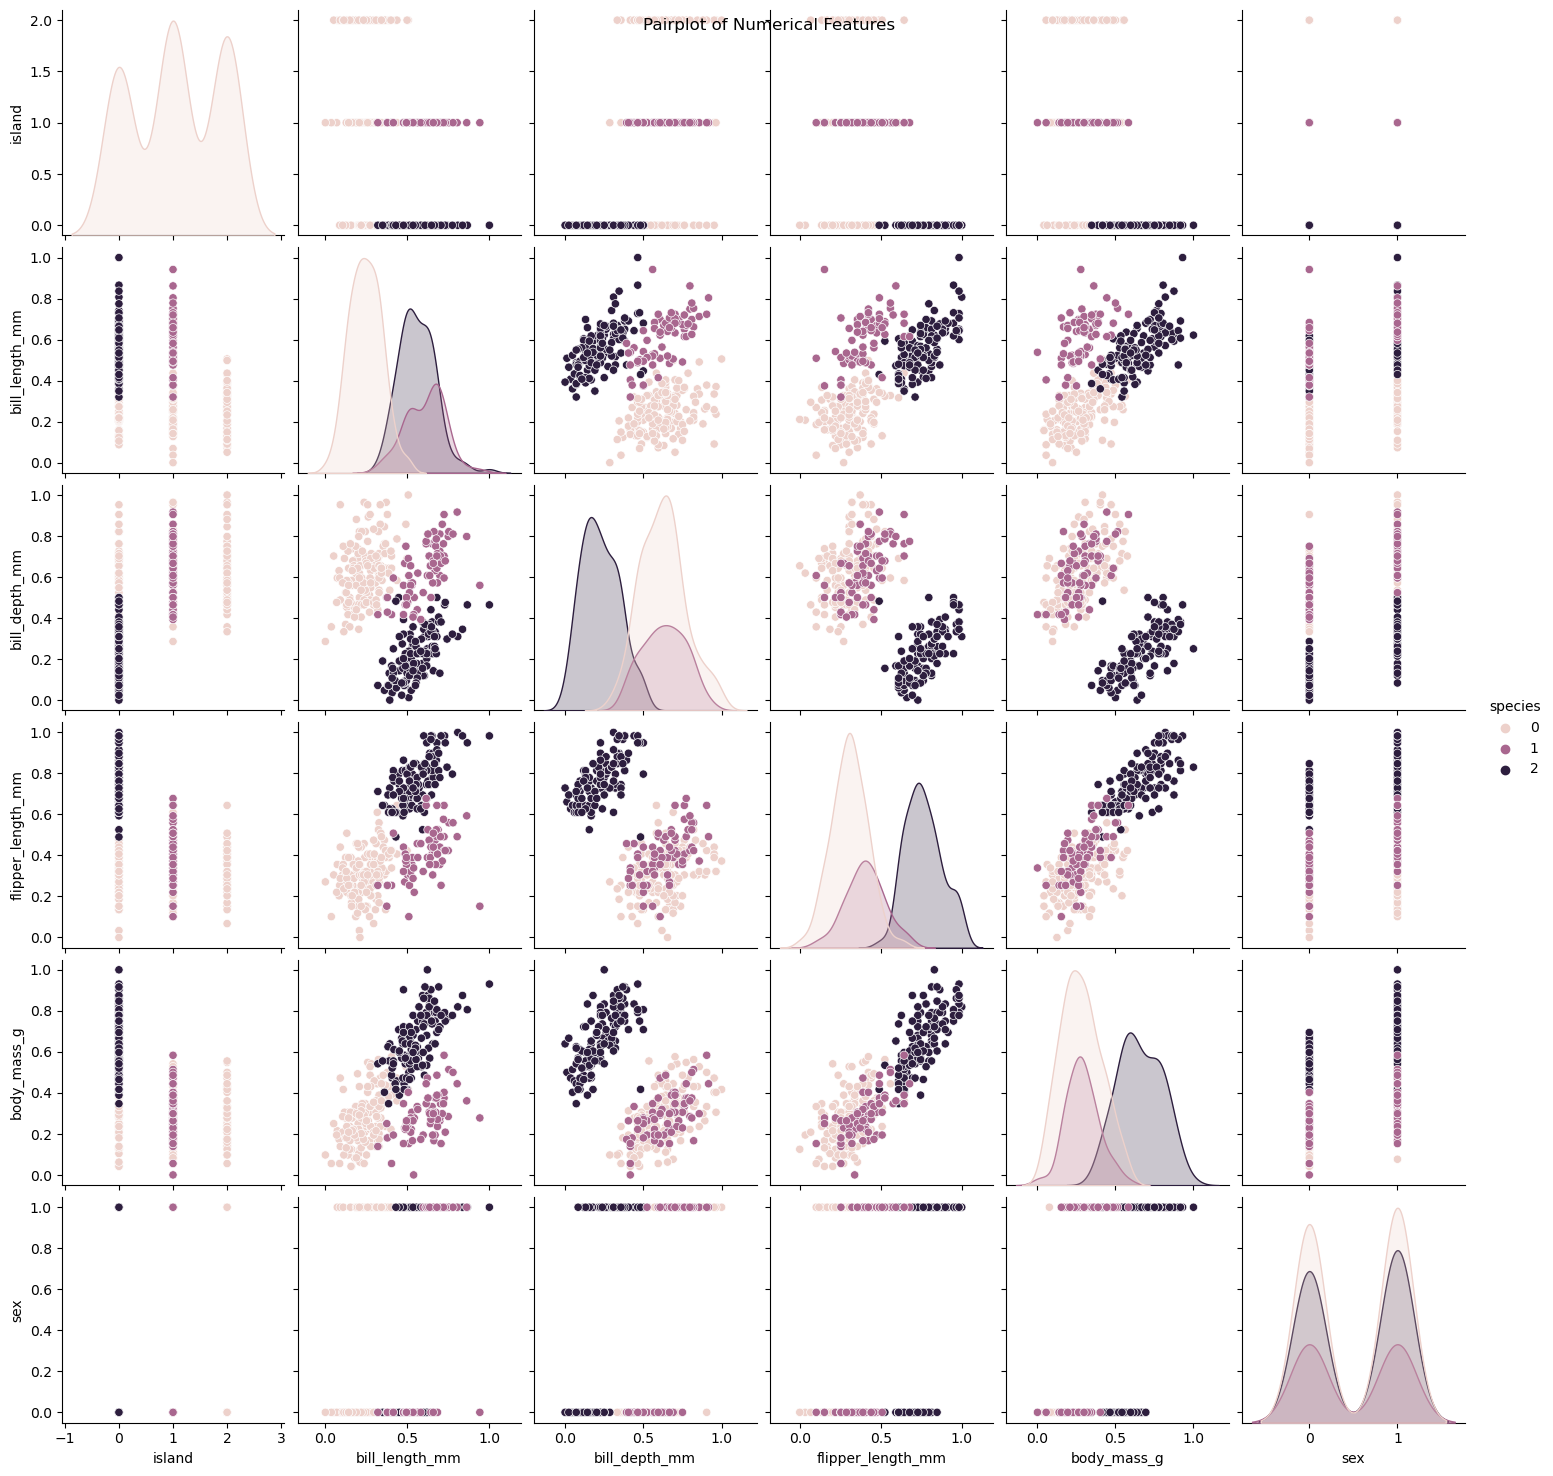

In [9]:
# Visualization 1 - Pairplot showing relationships between numerical features
sns.pairplot(penguins, hue="species")
plt.suptitle("Pairplot of Numerical Features")
plt.show()


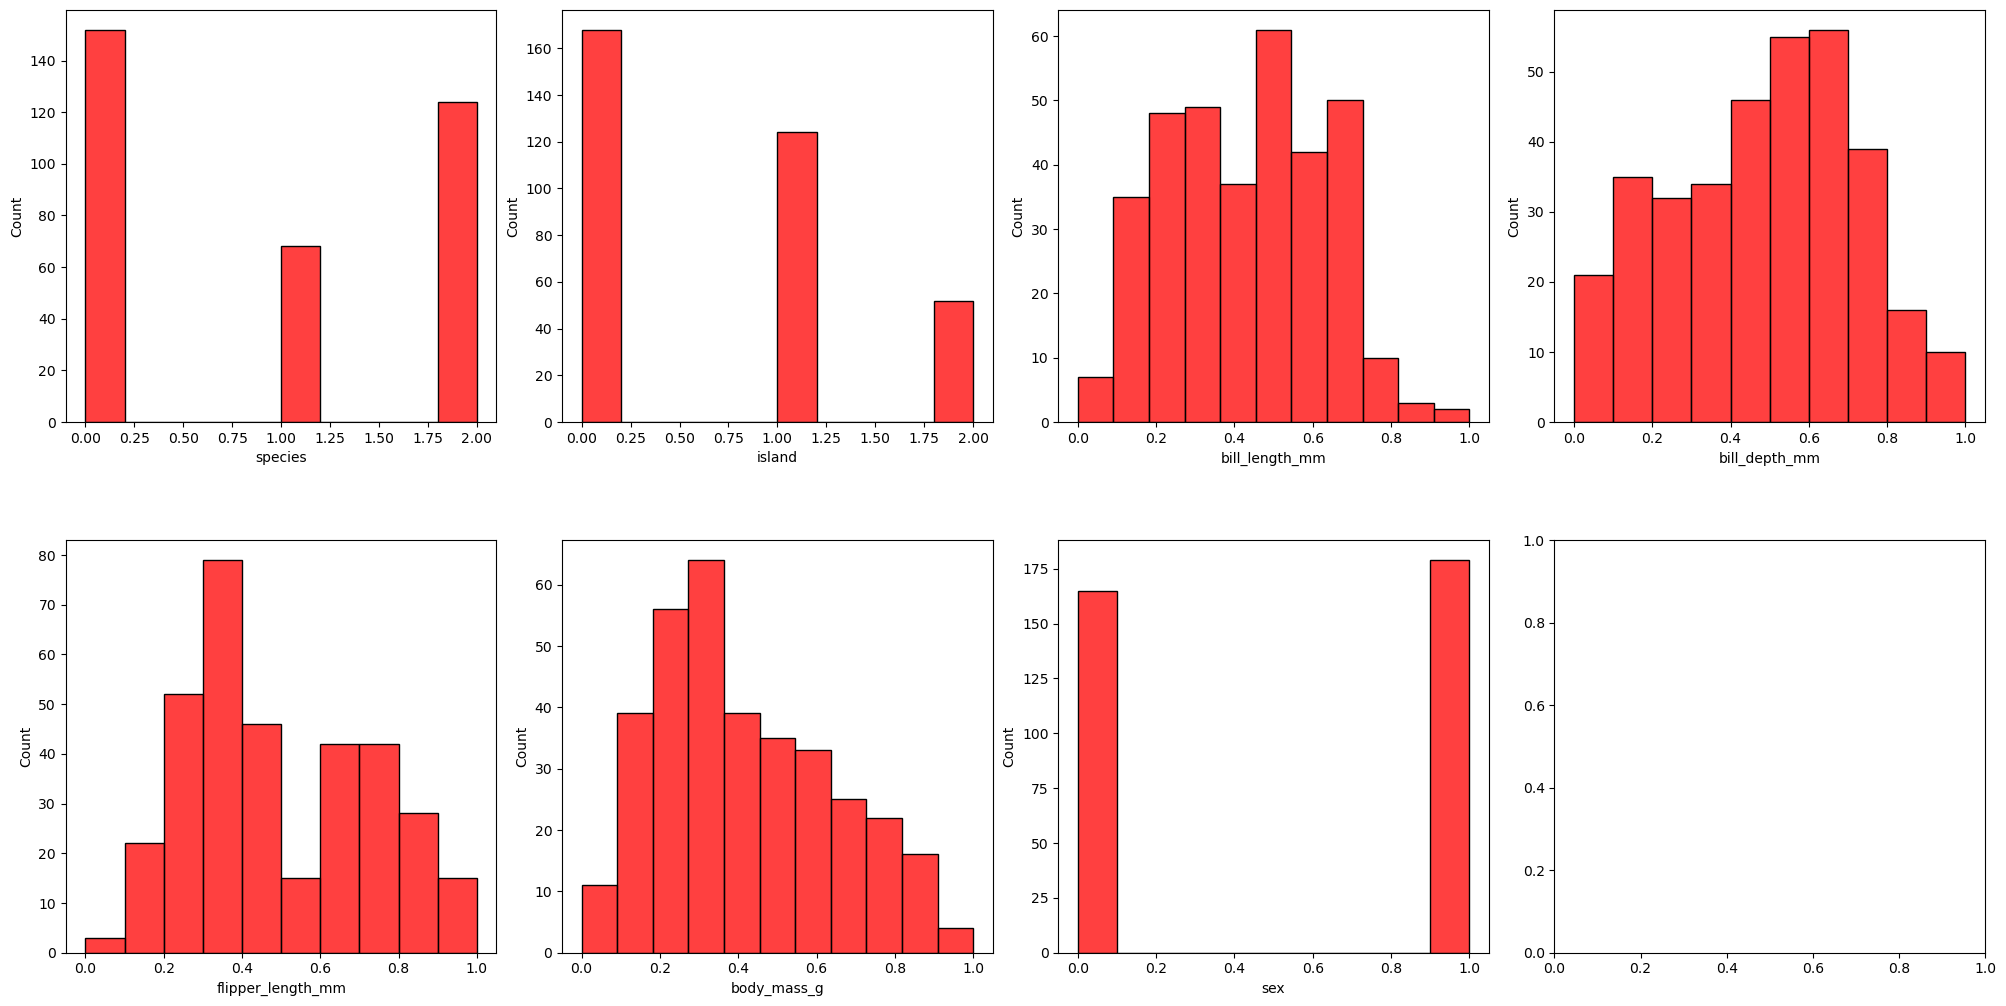

In [10]:
# Visualization 2 - Create dist plots using sns.histplot
fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in penguins.items():
    sns.histplot(value, color='r', ax=ax[index])  # Use sns.histplot instead of sns.displot
    index += 1

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)


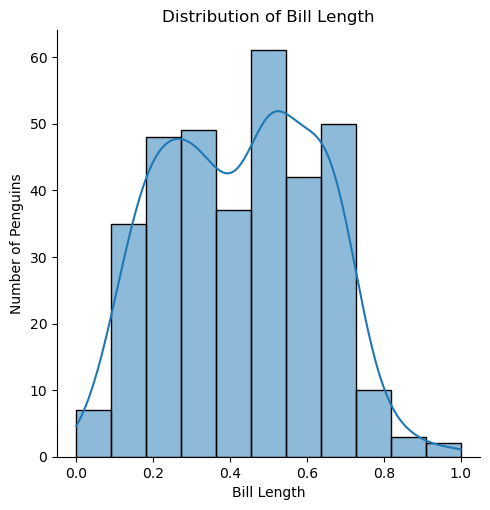

In [11]:
# Visualization 3 - Plotting a density distribution graph to see distribution of bill length.
sns.displot(penguins['bill_length_mm'], kde=True)
plt.title("Distribution of Bill Length")
plt.xlabel("Bill Length")
plt.ylabel("Number of Penguins")
plt.show()

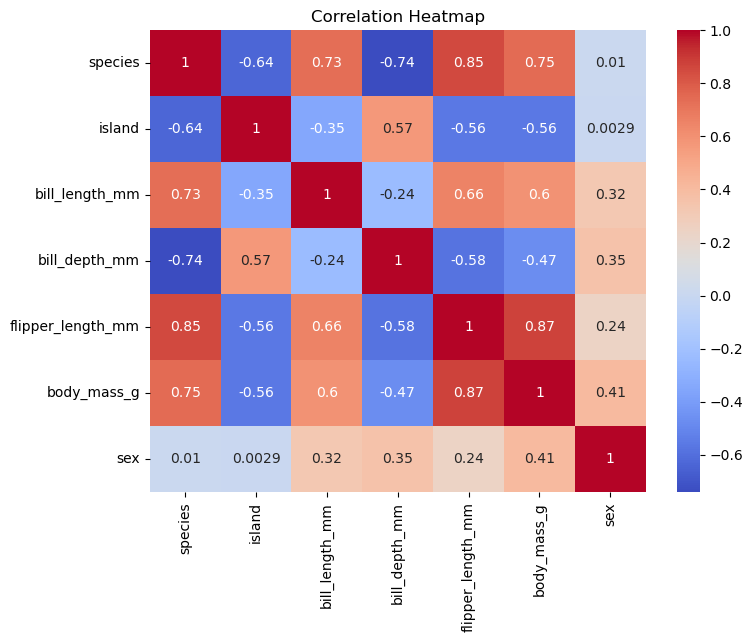

In [12]:
# Visualization 4 -Correlation heatmap
correlation_matrix = penguins.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

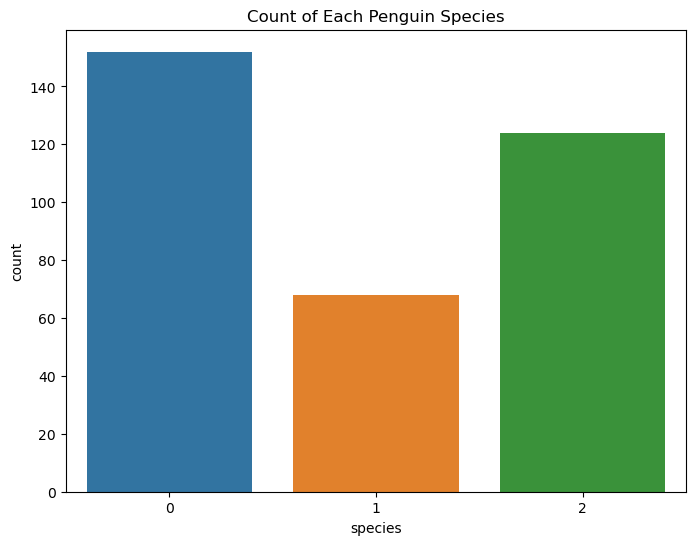

In [13]:
# Visualization 5 - Countplot of penguin species
plt.figure(figsize=(8, 6))
sns.countplot(data=penguins, x="species")
plt.title("Count of Each Penguin Species")
plt.show()

## Implementation of Logistic Regression

In [14]:
penguins_processed = penguins

# Selecting sex as a target variable.
X_data = penguins_processed.drop('sex', axis=1)
Y_target = penguins_processed['sex']

print("X_data Shape: ", X_data.shape)
print("Y_target Shape: ", Y_target.shape)


X_data Shape:  (344, 6)
Y_target Shape:  (344,)


In [15]:
# Splitting training and testing data as 80% and 20%
training_data = int(np.round(len(X_data) * 0.8))
testing_data = len(X_data) - training_data

X_train = X_data[:training_data]
X_test = X_data[-testing_data:]
Y_train = Y_target[:training_data]
Y_test = Y_target[-testing_data:]

print("X_train Shape: ", X_train.shape)
print("Y_train Shape: ", Y_train.shape)
print()
print("X_test Shape: ", X_test.shape)
print("Y_test Shape: ", Y_test.shape)

X_train Shape:  (275, 6)
Y_train Shape:  (275,)

X_test Shape:  (69, 6)
Y_test Shape:  (69,)


In [16]:
class LogitRegression():


    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None
    
    def fit(self, x_train, y_train):
        # Standardize the feature matrix
        X_scaled = self.feature_scaling(x_train)
        num_samples, num_features = X_scaled.shape

        # Initialize weights with random values between 0 and 1
        self.weights = np.random.uniform(0, 1, num_features)
        self.bias = 0.5

        # Initialize a list to store the loss values during training
        loss_values = []

        for iteration in range(self.iterations):
            # Calculate the gradient of the cost function
            gradient_weights, gradient_bias = self.gradient_descent(y_train, X_scaled)

            # Append the current cost to the list of loss values
            loss_values.append(self.cost(y_train, X_scaled))

            # Update the weights and bias using gradient descent
            self.weights = self.weights - (self.learning_rate * gradient_weights)
            self.bias = self.bias - (self.learning_rate * gradient_bias)

        return loss_values
    
    def sigmoid(self,feature):
        return 1 / (1 + np.exp(-feature))
    
    
    def cost(self, y_train, x_train):
        z = np.dot(x_train, self.weights.T) + self.bias

        # Apply the sigmoid function to get the predicted probabilities
        predicted_probabilities = self.sigmoid(z)

        # Calculate the cost components
        cost_positive = -(y_train) * np.log(predicted_probabilities)
        cost_negative = (1 - y_train) * np.log(1 - predicted_probabilities)

        # Calculate the overall cost
        total_cost = (1 / len(y_train)) * np.sum(cost_positive - cost_negative)

        return total_cost
        
    
    def gradient_descent(self, y_train, x_train):
        z = np.dot(x_train, self.weights.T) + self.bias
        predicted_probabilities = self.sigmoid(z)

        # Calculate the difference between predicted and actual target values
        prediction_error = predicted_probabilities - y_train

        # Calculate the gradient with respect to weights
        gradient_weights = np.dot(x_train.T, prediction_error) / len(y_train)

        # Calculate the gradient with respect to the bias
        gradient_bias = np.sum(prediction_error) / len(y_train)

        return gradient_weights, gradient_bias
    
    def feature_scaling(self, X):
        # Calculate the mean and standard deviation for each feature
        feature_means = np.mean(X, axis=0)
        feature_std_devs = np.std(X, axis=0)

        # Apply z-score standardization to scale the features
        X_scaled = (X - feature_means) / feature_std_devs

        return X_scaled

    
    
    def predict(self, x_test):
        # Standardize the feature matrix of the test data
        X_scaled = self.feature_scaling(x_test)

        # Calculate the linear combination of weights and standardized features
        z = np.dot(X_scaled, self.weights.T) + self.bias

        # Apply the sigmoid function to get predicted probabilities
        predicted_probabilities = self.sigmoid(z)

        # Initialize empty list to store predictions (0 or 1)
        y_pred = []

        for y_prob in predicted_probabilities:
            if y_prob >= 0.5:
                y_pred.append(1)
            else:
                y_pred.append(0)

        return y_pred


In [17]:
def accuracy(y_test, y_pred):
    matched_values = np.sum(y_test == y_pred)
    return matched_values / len(y_test)

In [18]:
# Hyperparameter setup 1
learning_rate = 1e-6
iterations = 10000

logistic_model = LogitRegression(learning_rate, iterations)
loss_values = logistic_model.fit(X_train, Y_train)

print("Loss values over each 1000 iterations:")

for i in range(0, len(loss_values), 1000):
    print(f"Iteration {i}: Loss = {loss_values[i]}")

predict = logistic_model.predict(X_test)

# Calculating accuracy of a function
acc = accuracy(Y_test, predict)
print("Accuracy: ", acc * 100, "%")

Loss values over each 1000 iterations:
Iteration 0: Loss = 0.5367361547119177
Iteration 1000: Loss = 0.5366854877775887
Iteration 2000: Loss = 0.536634847928512
Iteration 3000: Loss = 0.536584235135855
Iteration 4000: Loss = 0.5365336493708224
Iteration 5000: Loss = 0.5364830906046566
Iteration 6000: Loss = 0.536432558808638
Iteration 7000: Loss = 0.5363820539540852
Iteration 8000: Loss = 0.5363315760123538
Iteration 9000: Loss = 0.5362811249548376
Accuracy:  85.5072463768116 %


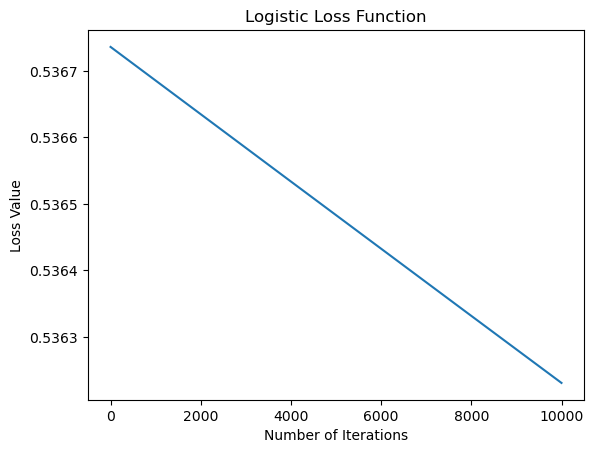

In [19]:
# Plotting loss function
plt.plot(loss_values)
plt.title("Logistic Loss Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Loss Value")
plt.show()

In [20]:
# Hyperparameter setup 2
learning_rate = 1e-3
iterations = 10000

logistic_model = LogitRegression(learning_rate, iterations)
loss_values = logistic_model.fit(X_train, Y_train)

print("Loss values over each 1000 iterations:")

for i in range(0, len(loss_values), 1000):
    print(f"Iteration {i}: Loss = {loss_values[i]}")

predict = logistic_model.predict(X_test)

# Calculating accuracy of a function
acc = accuracy(Y_test, predict)
print("Accuracy: ", acc * 100, "%")

Loss values over each 1000 iterations:
Iteration 0: Loss = 0.6478756538383497
Iteration 1000: Loss = 0.5664184546034798
Iteration 2000: Loss = 0.520559200038616
Iteration 3000: Loss = 0.4881106932217197
Iteration 4000: Loss = 0.4629539242627749
Iteration 5000: Loss = 0.4427172228358663
Iteration 6000: Loss = 0.4260817189922402
Iteration 7000: Loss = 0.4121760221526158
Iteration 8000: Loss = 0.40038659400391086
Iteration 9000: Loss = 0.3902683162412057
Accuracy:  88.40579710144928 %


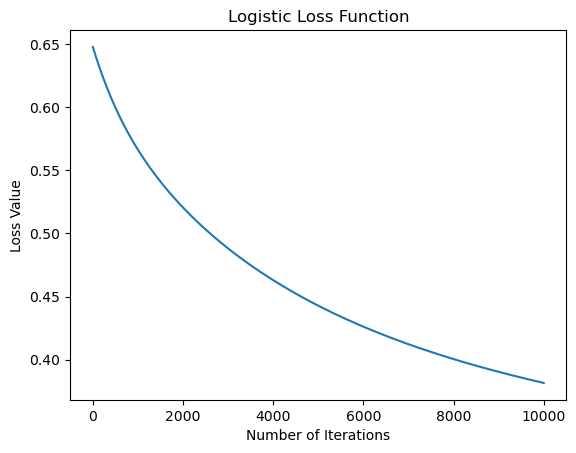

In [21]:
# Plotting loss function
plt.plot(loss_values)
plt.title("Logistic Loss Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Loss Value")
plt.show()

In [22]:
# Hyperparameter setup 3
learning_rate = 1e-2
iterations = 10000

logistic_model = LogitRegression(learning_rate, iterations)
loss_values = logistic_model.fit(X_train, Y_train)

print("Loss values over each 1000 iterations:")

for i in range(0, len(loss_values), 1000):
    print(f"Iteration {i}: Loss = {loss_values[i]}")

predict = logistic_model.predict(X_test)

# Calculating accuracy of a function
acc = accuracy(Y_test, predict)
print("Accuracy: ", acc * 100, "%")

Loss values over each 1000 iterations:
Iteration 0: Loss = 0.5792893010072199
Iteration 1000: Loss = 0.35211292035071096
Iteration 2000: Loss = 0.3169021146091488
Iteration 3000: Loss = 0.30133732077729963
Iteration 4000: Loss = 0.29273048156976783
Iteration 5000: Loss = 0.28736250475206593
Iteration 6000: Loss = 0.2837495903363827
Iteration 7000: Loss = 0.2811853815593063
Iteration 8000: Loss = 0.27929228447634435
Iteration 9000: Loss = 0.2778511974438542
Accuracy:  89.85507246376811 %


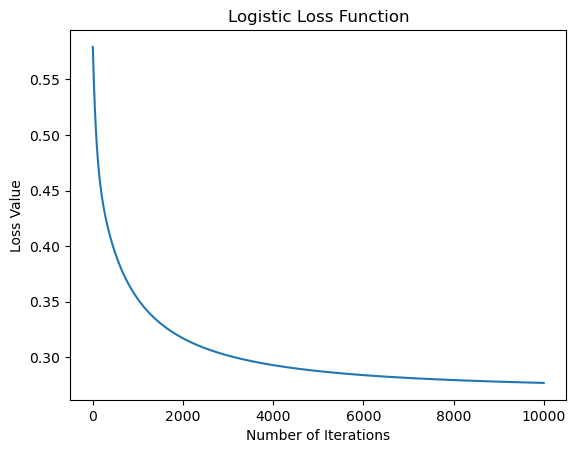

In [23]:
# Plotting loss function
plt.plot(loss_values)
plt.title("Logistic Loss Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Loss Value")
plt.show()

In [24]:
final_weight_vector = logistic_model.weights
print("Final Weight Vector:", final_weight_vector)

Final Weight Vector: [-0.98269593  0.13465561  1.64302202  2.70281232  0.16392692  2.38900079]
